<a href="https://colab.research.google.com/github/Alessandro-barbosa/CalculoNumerico/blob/main/calculo_numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Polinomio: 
            2
0.0001361 x + 0.04086 x + 8.388


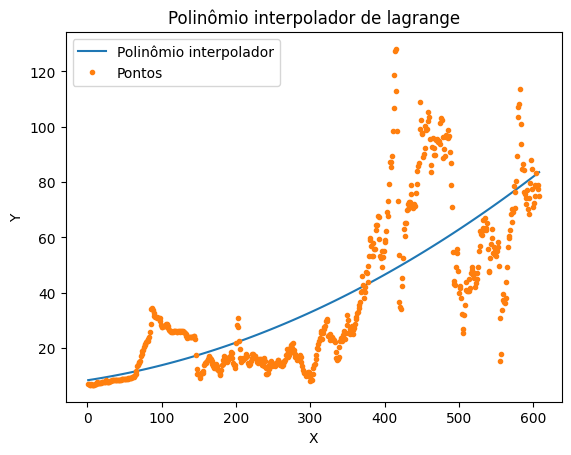

<ipython-input-33-fbfc781e706d>:74: RuntimeWarning: overflow encountered in scalar multiply
  s += A[i][j] * x[j]
<ipython-input-33-fbfc781e706d>:74: RuntimeWarning: overflow encountered in scalar add
  s += A[i][j] * x[j]


In [ ]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/CalculoNumerico/Barril_Valores.xlsx'

df = pd.read_excel(file_path)

coluna_a = []
coluna_b = []

# Pegando os dados da planilha no excel
for row in df.itertuples(index=False):
  if row[0] is not None or row[1] is not None:
    coluna_a.append(row[0])
    coluna_b.append(row[1])
  else:
    break

# transformação em array

x = np.array(coluna_a)
y = np.array(coluna_b)

coef = np.polyfit(x, y, 2)

polinomio = np.poly1d(coef)

print(f"Polinomio: \n {polinomio}")

def lagrange(x, y):
  def L(i):
    def product(j):
      if i == j:
        return 1
      else:
        return (x[i] - x[j]) / (x[i] - x[j])
    return np.prod([product(j) for j in range(len(x))])
  return np.array([L(i) for i in range(len(x))])


# matriz dos pontos de lagrange

# print(lagrange(x, y))

# plotando gráfico

xp = np.linspace(min(x), max(x), 100)

plt.plot(xp, polinomio(xp), label="Polinômio interpolador")

plt.plot(x, y, '.', label="Pontos")

plt.title("Polinômio interpolador de lagrange")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

## Etapa 3

def gauss_seidel(A, b, xO, tol=1e-6, max_iter=10000000):
    n = len(b)
    x = xO.copy()
    for k in range(max_iter):
        for i in range(n):
          s = 0
          for j in range(n):
            if j != i:
              s += A[i][j] * x[j]
          x[i] = (b[i] - s) / A[i][i]
        if abs(max(abs(x - xO))) < tol:
          return x
        xO = x.copy()
    raise ValueError(f"O método de Gauss-Seidel não converge após {max_iter} iterações")

A = [[10, 12, 11], [5, 4, 5], [2, 3, 2]]
b = [300, 350, 320]
xO = [0, 0, 0]

A = np.array(A)
b = np.array(b)
xO = np.array(xO)

solucao = gauss_seidel(A, b, xO)

print("Solução final:")
print(solucao)

# print("Conteúdo da coluna A:", x)
# print("Conteúdo da coluna B:", y)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
